In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_features.columns = df_features.columns.str.lower()
df_train.columns = df_train.columns.str.lower()
df_test.columns =df_test.columns.str.lower()

## data tyeps

* Numerical variables
* Categorical variables

In [3]:
df_features.dtypes

store             int64
date             object
temperature     float64
fuel_price      float64
markdown1       float64
markdown2       float64
markdown3       float64
markdown4       float64
markdown5       float64
cpi             float64
unemployment    float64
isholiday          bool
dtype: object

In [4]:
df_train.dtypes

store             int64
dept              int64
date             object
weekly_sales    float64
isholiday          bool
dtype: object

#### Numerical Variables

<Figure size 2500x600 with 0 Axes>

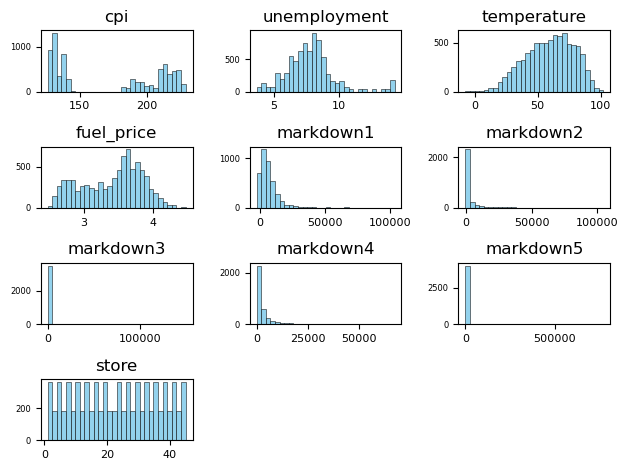

In [5]:
columns = ['cpi', 'unemployment', 'temperature', 'fuel_price', 'markdown1',
           'markdown2', 'markdown3', 'markdown4', 'markdown5','store']
# Define a list of attractive colors
colors = ['skyblue', 'salmon', 'lightgreen', 'purple']


plt.figure(figsize=(25, 6))
df_features.hist(column = columns, grid = False,xlabelsize= 8, xrot= 0.0, ylabelsize= 6, yrot = 0.0,  bins=30,
                 color='skyblue', edgecolor='black', alpha=0.9, linewidth=.4)  # Adjust the number of bins as needed
plt.xlabel('value')
plt.ylabel('frequency')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()


In [6]:
df_features.cpi.value_counts()

cpi
132.716097    33
139.122613    24
224.802531    12
201.070571    12
130.896645    11
              ..
215.932780     1
215.552886     1
215.172993     1
214.793099     1
219.260435     1
Name: count, Length: 2505, dtype: int64

In [7]:
# # use of attribute 'by' not usefull in this case


# plt.figure(figsize=(25, 3))
# df_features.hist(column = columns,by= 'isholiday' , grid = False,xlabelsize= 8, xrot= 0.0, ylabelsize= 6, yrot = 0.0,  bins=30,
#                   )  # Adjust the number of bins as needed
# plt.xlabel('value')
# plt.ylabel('frequency')

# plt.tight_layout()  # Adjust layout to prevent overlap

# plt.show()

<Figure size 2500x600 with 0 Axes>

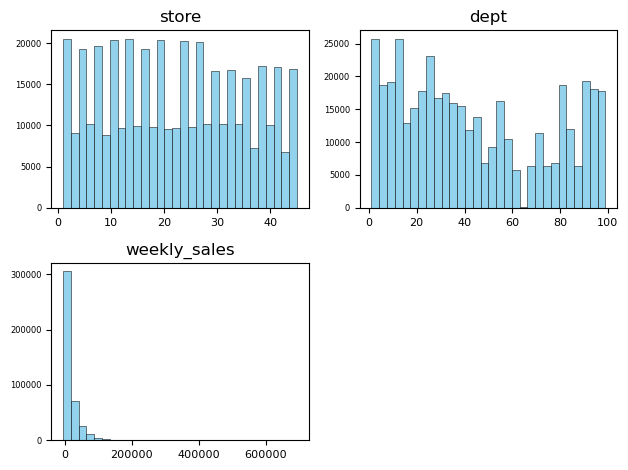

In [8]:
columns = ['store', 'dept', 'weekly_sales']
# Define a list of attractive colors
colors = ['skyblue', 'salmon', 'lightgreen', 'purple']


plt.figure(figsize=(25, 6))
df_train.hist(column = columns, grid = False,xlabelsize= 8, xrot= 0.0, ylabelsize= 6, yrot = 0.0,  bins=30,
                 color='skyblue', edgecolor='black', alpha=0.9, linewidth=.4)  # Adjust the number of bins as needed
plt.xlabel('value')
plt.ylabel('frequency')

plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

#### Categorical Variables(store datasets)

In [9]:
df_stores = pd.read_csv('stores.csv')

df_stores.columns = df_stores.columns.str.lower()
df_stores.head()

,store,type,size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
df_stores.isnull().sum()

store    0
type     0
size     0
dtype: int64

In [11]:
cat = list(df_stores.type.value_counts().index)
val = list(df_stores.type.value_counts().values)
cat, val

(['A', 'B', 'C'], [22, 17, 6])

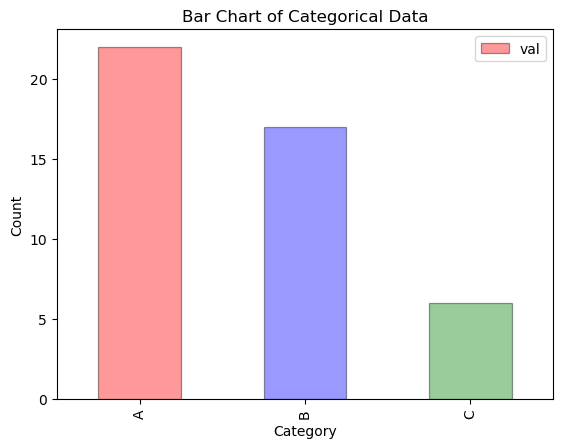

In [12]:
# bar 
import pandas as pd
import matplotlib.pyplot as plt


# Example data
# data = {'Category': ['A', 'B', 'C'],
#         'Count': list(df_stores.type.value_counts())}
# df = pd.DataFrame(data)

data = {'cat':list(df_stores.type.value_counts().index),
       'val':list(df_stores.type.value_counts().values)}
df = pd.DataFrame(data)

# Plot a bar chart
df.plot.bar(x='cat', y='val', color=['red','blue','green'], edgecolor='black', alpha=0.4, linewidth=.9)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart of Categorical Data')
plt.show()



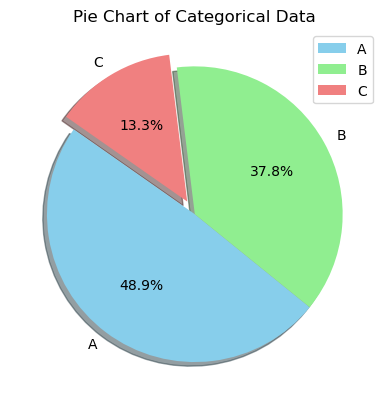

In [13]:
# pie
explode = (0, 0, 0.1)
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Example data
# data = {'Category': ['A', 'B', 'C', 'D'],
#         'Count': [10, 20, 15, 25]}
# df = pd.DataFrame(data)

data = {'category':list(df_stores.type.value_counts().index),
       'val_counts':list(df_stores.type.value_counts().values)}
df = pd.DataFrame(data)

# Plot a pie chart
df.plot.pie(y='val_counts', labels=df['category'], autopct='%1.1f%%', colors = colors,
            explode = explode, shadow=True, startangle= 145)

plt.ylabel('')  # Remove y-label for a cleaner chart
plt.title('Pie Chart of Categorical Data')
plt.show()


In [14]:
# correlation factor between variables(train datasets)

from scipy.stats import chi2_contingency

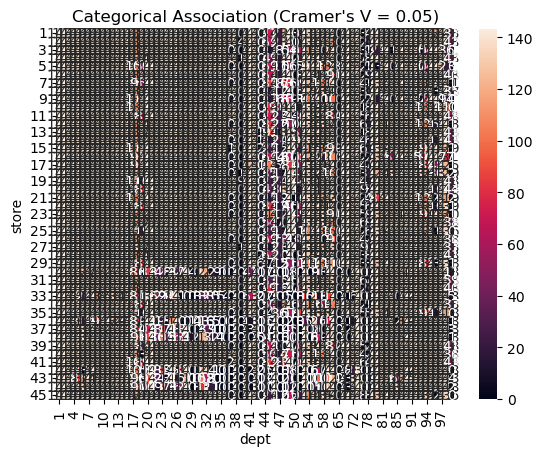

In [15]:
data = {'store':df_train.store,
       'dept':df_train.dept}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['store'], df['dept'])

# Calculate Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_value = cramers_v(contingency_table)

# Visualize the association using a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title(f'Categorical Association (Cramer\'s V = {cramers_v_value:.2f})')
plt.xlabel('dept')
plt.ylabel('store')
plt.show()

In [16]:
df_train.dtypes

store             int64
dept              int64
date             object
weekly_sales    float64
isholiday          bool
dtype: object

In [17]:
df_train

,store,dept,date,weekly_sales,isholiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### missing values

In [18]:
df_features.date.isnull().sum(), df_train.date.isnull().sum()

(0, 0)

In [19]:
df_features.isnull().sum()

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64

In [20]:
df_train.isnull().sum()

store           0
dept            0
date            0
weekly_sales    0
isholiday       0
dtype: int64

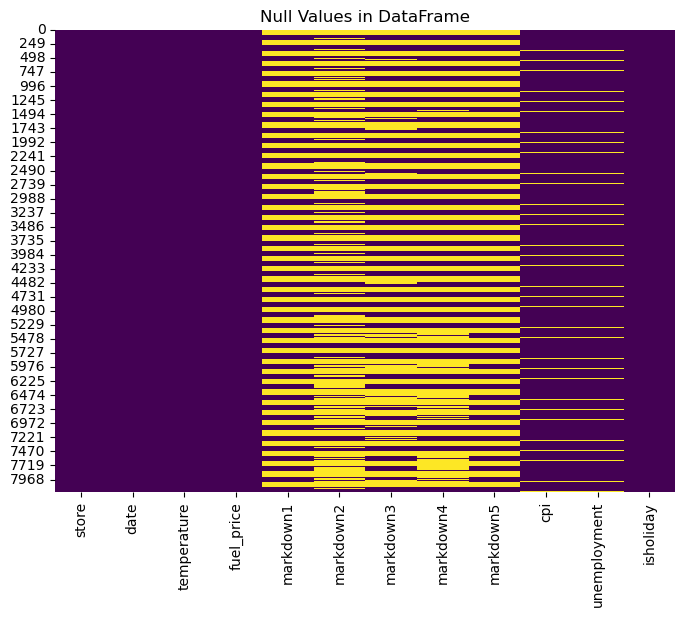

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_features.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in DataFrame')
plt.show()

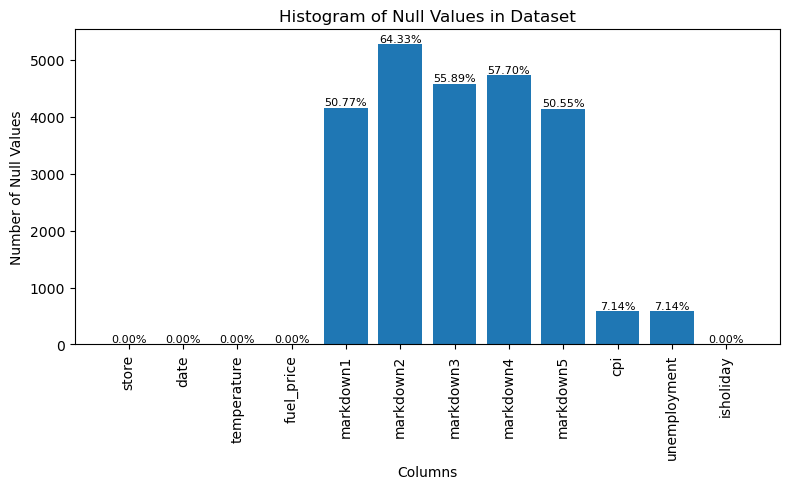

In [22]:
null_counts = df_features.isnull().sum()
total_rows = len(df_features)
missing_percent = (df_features.isnull().sum()/total_rows)*100


plt.figure(figsize=(8, 5))
bars = plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Histogram of Null Values in Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

for bar, percent in zip(bars, missing_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{percent:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
